In [1]:
from data_generators import get_train_test_addition

#dimensjoner og størrelser til x og y
n_digits = 2
n_max = 3*n_digits
m = 10

#definerer størrelsen på parametermatrisene
d = 15
k = 5
p = 20

#henter treningsdata
data = get_train_test_addition(n_digits,samples_per_batch=250,n_batches_train=10)

In [17]:
from utils import onehot
x = data['x_train'][0]
X = onehot(x,m)
y = data['y_train'][0]


[[7 9 7 6 5 5]
 [1 3 9 5 8 0]
 [9 8 8 2 0 8]
 ...
 [4 5 0 0 5 4]
 [8 8 8 6 4 7]
 [7 2 0 2 4 7]]


In [3]:
data['x_train'].shape

(10, 250, 6)

In [4]:
from layers import LinearLayer,EmbedPosition,Attention,Softmax,CrossEntropy,FeedForward

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

In [5]:
#vi ser at dLdW_2 tilhørende ff1 (først finner vi det lineære laget l2
#så nøkkel 'w' i params dict-en, så nøkkel 'd' for å finne den deriverte)
#nå er denne bare en nullmatrise 
ff1.l2.params['w']['d']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [6]:
#"manuelt" forward pass (tilsvarende algoritme 1)
z0 = embed.forward(X)
z1 = att1.forward(z0)
z2 = ff1.forward(z1)
z = un_embed.forward(z2)
Z = softmax.forward(z)

In [7]:
#evaluerer objektfunksjonen
L = loss.forward(Z,y)
print(L)

#finner den deriverte av objektfunksjonen mhp Z
dLdZ = loss.backward()

3.4231831482353057


In [8]:
#"manuelt" backward pass (tilsvarende algoritme 2)
dLdz = softmax.backward(dLdZ)
print('1')
dLdz2 = un_embed.backward(dLdz)
print('2')
dLdz1 = ff1.backward(dLdz2)
print('3')
dLdz0 = att1.backward(dLdz1)
print('4')
embed.backward(dLdz0)

1
2
3
4


In [9]:
#etter backward pass har dLdW_2 fått verdier
ff1.l2.params['w']['d']

array([[-6.38806003e+00, -2.99444477e-01, -1.45927342e+01,
        -5.08362207e-01, -8.56967102e-01, -1.73191581e+00,
        -3.15676764e-01, -1.26316226e+00, -3.39248952e+00,
        -5.59953067e+00, -9.84819831e-01, -7.89410687e+00,
        -1.50163900e+01, -4.51241599e-01, -3.04956261e-01,
        -5.14918852e-01, -8.37545279e+00, -3.05612111e-01,
        -1.91411313e+00, -3.80217145e+00],
       [ 3.16795158e+00,  1.09867440e-01,  5.21761901e+00,
         2.90648292e-01,  2.65042533e-01,  1.38312954e+00,
        -6.47579509e-02,  9.13934737e-01,  2.58148314e+00,
         3.98399685e+00, -1.75393977e-01,  2.55624594e+00,
         7.00394452e+00,  6.90439049e-02,  3.23275803e-03,
        -1.55308826e-01,  3.39344240e+00,  2.27491592e-01,
         4.87125561e-01,  1.95533273e+00],
       [-1.80159038e+01,  1.65465617e-01, -3.75358147e+01,
        -3.57483344e-01,  7.02278071e-01, -3.72295678e+00,
         1.81857397e-01, -2.37208151e+00,  5.85924807e-01,
        -1.22340650e-01, -4.5

In [10]:
from neural_network import NeuralNetwork

#vi kan samle lagene i en liste som vi bruker for å
#initialisere et nevralt nettverk der vi kan bruke forward() og backward() 
#for å oppnå det samme som vi gjorde manuelt over

layers = [embed,att1,ff1,un_embed,softmax]
nn = NeuralNetwork(layers)

In [11]:
#forward pass tilsvarende algoritme 1
Z = nn.forward(X)

#beregner loss med CrossEntropy
L = loss.forward(Z,y)
print(L)

#backward pass tilsvarende algoritme 2
dLdZ = loss.backward()
nn.backward(dLdZ)

3.4231831482353057


In [12]:
#før optimering er W_2[0,0] gitt ved
#ff1 er det tredje laget i layers-listen (derav layers[2])
W_2_pre_opt = nn.layers[2].l2.params['w']['w'].copy()
print(W_2_pre_opt[0,0])

-0.04848045427527831


In [16]:
import numpy as np
x = data['x_train'][0]
print(m)
X = onehot(x,m)
y = data['y_train'][0]
print(x.shape)
def algorithm_4(x, y, m , d, p, k, n_max):
    n_iter = 100
    loss = CrossEntropy()
    L_arr = np.zeros(n_iter)
    feed_forward1 = FeedForward(d,p)
    attention1 = Attention(d,k)
    embed_pos = EmbedPosition(n_max,m,d)
    un_embed_pos = LinearLayer(d,m)
    softmax = Softmax()
    layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
    nueralnet = NeuralNetwork(layers)

    alpha = 0.001
    Losses = []
    for j in range(1,n_iter):
        X = onehot(x, m)
        Z = nueralnet.forward(X) 
        Losses.append(loss.forward(Z,y))
        dLdz = loss.backward()
        nueralnet.backward(dLdz) 
        layers[0].step_gd(alpha)
        layers[1].step_adam(j, alpha)
        layers[2].step_gd(alpha)
        layers[3].step_adam(j, alpha)
        print(f'loss for iteration {j}: {loss.forward(Z,y)}') 
    return Losses   

arr = algorithm_4(x, y, m , d, p, k, n_max)

10
(250, 6)
loss for iteration 1: 3.1329952623389086
loss for iteration 2: 3.4101361367573544
loss for iteration 3: 2.725690774216228
loss for iteration 4: 2.727034401502436
loss for iteration 5: 2.8673749940609965
loss for iteration 6: 2.7404357695305857
loss for iteration 7: 2.981984780897206
loss for iteration 8: 2.8219222680712215
loss for iteration 9: 2.8496901050466477
loss for iteration 10: 2.7943758169517854
loss for iteration 11: 2.713482642234107
loss for iteration 12: 3.1569842574665685
loss for iteration 13: 2.8216370216619877
loss for iteration 14: 3.3551766660840943
loss for iteration 15: 3.369798443375579
loss for iteration 16: 3.195784394326838
loss for iteration 17: 3.1971303496700285
loss for iteration 18: 2.994567258138612
loss for iteration 19: 2.9296187617920904
loss for iteration 20: 3.0616364200898474
loss for iteration 21: 3.071784390135877
loss for iteration 22: 2.725032756866731
loss for iteration 23: 3.221161811298082
loss for iteration 24: 4.237299452939367


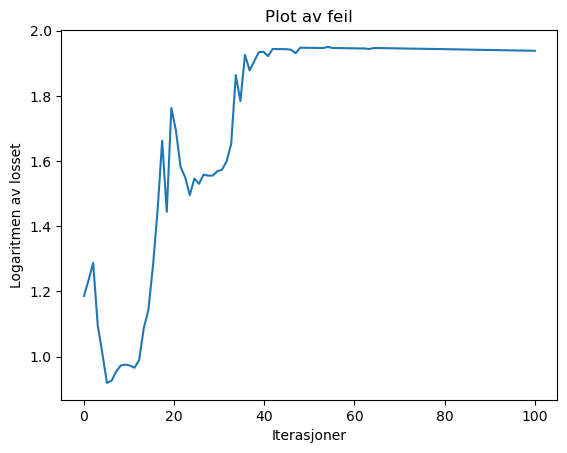

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,100,len(arr)),np.log(arr))
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()

In [ ]:
#etter trening ser vi at W_2 er gitt ved

W_2_post_opt = nn.layers[2].l2.params['w']['w'].copy()
print(W_2_post_opt[0,0])

#dersom differansen er større enn null har dette parameteret endret seg etter 
#gradient descent
print(W_2_post_opt[0,0] - W_2_pre_opt[0,0])




0.03835633844623216
0.0
